<a href="https://colab.research.google.com/github/mobarakol/tutorial_notebooks/blob/main/bbox_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#2D bbox visualization
Endovis 2017:<br>

Download image and bbox annotation xml.

In [1]:
!git clone https://github.com/mobarakol/MICCAI-2017-Robotic-Instrument-Segmentation.git

Cloning into 'MICCAI-2017-Robotic-Instrument-Segmentation'...
remote: Enumerating objects: 75, done.
remote: Counting objects: 100% (75/75), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 75 (delta 21), reused 8 (delta 0), pack-reused 0
Receiving objects: 100% (75/75), 986.11 KiB | 2.64 MiB/s, done.
Resolving deltas: 100% (21/21), done.


visualization

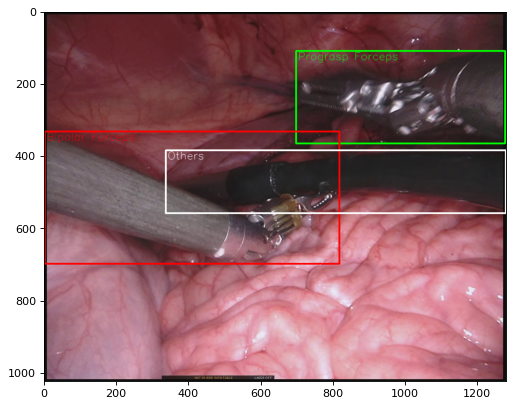

In [2]:

import os
import sys
import cv2
from glob import glob
from PIL import Image
%matplotlib inline
from matplotlib import pyplot as plt
plt.figure(figsize=(8, 6), dpi=80)

if sys.version_info[0] == 2:
    import xml.etree.cElementTree as ET
else:
    import xml.etree.ElementTree as ET

font = cv2.FONT_HERSHEY_SIMPLEX
INSTRUMENT_CLASSES = ( '', 'Bipolar Forceps', 'Prograsp Forceps', 'Large Needle Driver', 'Vessel Sealer',
    'Grasping Retractor', 'Monopolar Curved Scissors', 'Others')

#bbox color for each class
color_mode = [(0,0,255),(0,255,0),(255,0,0),(0,255,255),(255,0,255),(255,255,0),(255,255,255)]

for img_name in glob('MICCAI-2017-Robotic-Instrument-Segmentation/instrument_dataset_1/images/frame000.jpg'):
    _img_orig = Image.open(img_name).convert('RGB')
    img  = cv2.imread(img_name)
    _xml_dir = os.path.dirname(os.path.dirname(img_name)) + '/xml/' + os.path.basename(img_name[:-4]) + '.xml'
    _xml = ET.parse(_xml_dir).getroot()
    class_to_ind = dict(zip(INSTRUMENT_CLASSES, range(len(INSTRUMENT_CLASSES))))

    for obj in _xml.iter('objects'):
        name = obj.find('name').text.strip()
        bbox = obj.find('bndbox')
        bbox_col = INSTRUMENT_CLASSES.index(str(name)) - 1;
        pts = ['xmin', 'ymin', 'xmax', 'ymax']
        bndbox = []
        label_idx = class_to_ind[name]
        for i, pt in enumerate(pts):
            cur_pt = int(bbox.find(pt).text)
            bndbox.append(cur_pt)

        top_corner, down_corner = (int(bndbox[0]), int(bndbox[1])), (int(bndbox[2]), int(bndbox[3]))
        cv2.rectangle(img, top_corner, down_corner, color_mode[bbox_col], thickness=4)
        cv2.putText(img,str(name),(top_corner[0]+5, top_corner[1]+25), font, 1,color_mode[bbox_col],1,cv2.LINE_AA)
        plt.imshow(img[:,:,::-1])
        plt.imsave(os.path.basename(img_name), img[:,:,::-1])

Endovis 2018

In [3]:
import gdown

#endovis18 dataset
url = 'https://drive.google.com/uc?id=1lRNAgC-6QgIQd-vum-jr523tYPr6yNM7'
gdown.download(url,'endovis18.zip',quiet=True)
!unzip -q endovis18.zip

In [4]:
import xml.etree.ElementTree as ET
import os
from glob import glob
from tqdm import tqdm

root_dir = "endovis18/"
dest_dir = root_dir

class_name_to_id_mapping = {
    "kidney": 0,
    "bipolar_forceps": 1,
    "prograsp_forceps": 2,
    "large_needle_driver": 3,
    "monopolar_curved_scissors": 4,
    "ultrasound_probe": 5,
    "suction": 6,
    "clip_applier": 7,
    "stapler": 8,
}



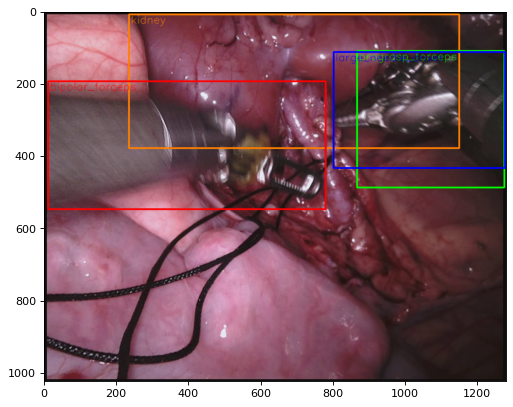

In [5]:
import os
import sys
import cv2
from glob import glob
from PIL import Image
%matplotlib inline
from matplotlib import pyplot as plt
plt.figure(figsize=(8, 6), dpi=80)

if sys.version_info[0] == 2:
    import xml.etree.cElementTree as ET
else:
    import xml.etree.ElementTree as ET

font = cv2.FONT_HERSHEY_SIMPLEX
INSTRUMENT_CLASSES = ( 'kidney', 'bipolar_forceps', 'prograsp_forceps', 'large_needle_driver', 'monopolar_curved_scissors',
    'ultrasound_probe', 'suction', 'clip_applier', 'stapler')

#bbox color for each class
color_mode = [(0,0,255),(0,255,0),(255,0,0),(0,255,255),(255,0,255),(255,255,0),(255,255,255),(255,127,255) ,(0,127,255)]

for img_name in glob('/content/endovis18/seq_2/left_frames/frame071.png'):
    _img_orig = Image.open(img_name).convert('RGB')
    img  = cv2.imread(img_name)
    _xml_dir = os.path.dirname(os.path.dirname(img_name)) + '/xml/' + os.path.basename(img_name[:-4]) + '.xml'
    _xml = ET.parse(_xml_dir).getroot()
    class_to_ind = dict(zip(INSTRUMENT_CLASSES, range(len(INSTRUMENT_CLASSES))))

    for obj in _xml.iter('objects'):
        name = obj.find('name').text.strip()
        bbox = obj.find('bndbox')
        bbox_col = INSTRUMENT_CLASSES.index(str(name)) - 1;
        pts = ['xmin', 'ymin', 'xmax', 'ymax']
        bndbox = []
        label_idx = class_to_ind[name]
        for i, pt in enumerate(pts):
            cur_pt = int(bbox.find(pt).text)
            bndbox.append(cur_pt)

        top_corner, down_corner = (int(bndbox[0]), int(bndbox[1])), (int(bndbox[2]), int(bndbox[3]))
        cv2.rectangle(img, top_corner, down_corner, color_mode[bbox_col], thickness=4)
        cv2.putText(img,str(name),(top_corner[0]+5, top_corner[1]+25), font, 1,color_mode[bbox_col],1,cv2.LINE_AA)
        plt.imshow(img[:,:,::-1])
        plt.imsave(os.path.basename(img_name), img[:,:,::-1])